In [74]:
#list of useful imports that  I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tensorflow.python.util import deprecation
from urllib.parse import urlparse


%matplotlib inline
import os

import numpy as np

import seaborn as sns
import random

import pickle


from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score,log_loss,roc_auc_score
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

In [75]:
pip install tldextract

In [76]:
import tldextract

In [77]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Zip File Path
file_name = '/content/drive/My Drive/Malicious_detection/malicious_website_detection.zip'

In [79]:
# Extract the zipfile using python
from zipfile import ZipFile
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [80]:
!ls

data.csv  drive  sample_data


In [81]:
# Load the data using pandas
urldata = pd.read_csv('data.csv')

In [82]:
urldata.head(5)

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [83]:
urldata.shape

(420464, 2)

In [84]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     420464 non-null  object
 1   label   420464 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [85]:
#Checking Missing Values
urldata.isnull().sum()

url      0
label    0
dtype: int64

In [86]:
urldata['label'].value_counts()

good    344821
bad      75643
Name: label, dtype: int64

In [87]:
fig = go.Figure([go.Pie(labels=['good', 'bad'], values=[urldata['label'].value_counts()[0], urldata['label'].value_counts()[1]])])
fig.update_layout(title='Percentage of data points for ecah class')
fig.show()

In [88]:
!pip install tld

## 1. DATA PREPROCESSING

The following features will be extracted from the URL for classification.
1. Length Features

  i. Length Of Url

  ii. Length of Hostname

  iii. Length Of Path

  iv. Length Of First Directory

  v. Length Of Top Level Domain

2. Count Features

  i. Count Of '-'

  ii. Count Of '@'

  iii. Count Of '?'

  iv. Count Of '%'

  v. Count Of '.'

  vi. Count Of '='

  vii.Count Of 'http'

  viii. Count Of 'www'

  ix. Count Of Digits

  x. Count Of Letters

  xi. Count Of Number Of Directories

3. Binary Features

  i. Use of IP or not

  ii. Use of Shortening URL or not

Apart from the lexical features, we will use TFID - Term Frequency Inverse Document as well

In [89]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

### Length Features

In [90]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))


In [91]:
urldata.head()

,url,label,url_length,hostname_length,path_length
0,diaryofagameaddict.com,bad,22,0,22
1,espdesign.com.au,bad,16,0,16
2,iamagameaddict.com,bad,18,0,18
3,kalantzis.net,bad,13,0,13
4,slightlyoffcenter.net,bad,21,0,21


In [92]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [93]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length
0,diaryofagameaddict.com,bad,22,0,22,0
1,espdesign.com.au,bad,16,0,16,0
2,iamagameaddict.com,bad,18,0,18,0
3,kalantzis.net,bad,13,0,13,0
4,slightlyoffcenter.net,bad,21,0,21,0


In [94]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))


In [95]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,diaryofagameaddict.com,bad,22,0,22,0,None,-1
1,espdesign.com.au,bad,16,0,16,0,None,-1
2,iamagameaddict.com,bad,18,0,18,0,None,-1
3,kalantzis.net,bad,13,0,13,0,None,-1
4,slightlyoffcenter.net,bad,21,0,21,0,None,-1


In [96]:
urldata['tld'].value_counts()

com       65
com.br    16
ru         4
de         4
net        4
org        3
no         2
ga         2
gov.vn     2
gq         2
lu         2
es         1
ws         1
eu         1
com.ba     1
edu.co     1
info       1
it         1
in         1
inf.br     1
Name: tld, dtype: int64

In [97]:
len(urldata['tld']== None)

420464

In [98]:
urldata['tld_length'].value_counts()

-1    420349
 3        72
 6        21
 2        21
 4         1
Name: tld_length, dtype: int64

In [99]:
urldata = urldata.drop("tld",1)

In [100]:
#Dataset after extracting length features
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length
0,diaryofagameaddict.com,bad,22,0,22,0,-1
1,espdesign.com.au,bad,16,0,16,0,-1
2,iamagameaddict.com,bad,18,0,18,0,-1
3,kalantzis.net,bad,13,0,13,0,-1
4,slightlyoffcenter.net,bad,21,0,21,0,-1


###  Count Features 

In [101]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [102]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [103]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [104]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [105]:
# Data after extracting Count Features
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,diaryofagameaddict.com,bad,22,0,22,0,-1,0,0,0,0,1,0,0,0,0,0,21,0
1,espdesign.com.au,bad,16,0,16,0,-1,0,0,0,0,2,0,0,0,0,0,14,0
2,iamagameaddict.com,bad,18,0,18,0,-1,0,0,0,0,1,0,0,0,0,0,17,0
3,kalantzis.net,bad,13,0,13,0,-1,0,0,0,0,1,0,0,0,0,0,12,0
4,slightlyoffcenter.net,bad,21,0,21,0,-1,0,0,0,0,1,0,0,0,0,0,20,0


### Binary Features

In [106]:
import re

In [107]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [108]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [109]:
#Data after extracting Binary Features
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,diaryofagameaddict.com,bad,22,0,22,0,-1,0,0,0,0,1,0,0,0,0,0,21,0,1,-1
1,espdesign.com.au,bad,16,0,16,0,-1,0,0,0,0,2,0,0,0,0,0,14,0,1,1
2,iamagameaddict.com,bad,18,0,18,0,-1,0,0,0,0,1,0,0,0,0,0,17,0,1,-1
3,kalantzis.net,bad,13,0,13,0,-1,0,0,0,0,1,0,0,0,0,0,12,0,1,1
4,slightlyoffcenter.net,bad,21,0,21,0,-1,0,0,0,0,1,0,0,0,0,0,20,0,1,1


In [110]:
urldata['label'].value_counts()[0]

344821

In [111]:
# Upsampling
from sklearn.utils import resample
df_majority = urldata[urldata.label == 'good']
df_minarity = urldata[urldata.label == 'bad']

df_upsample = resample(df_minarity, n_samples = 100000, replace = True)
df_downsample = resample(df_majority, n_samples = 100000, replace = False)

urldata = pd.concat([df_upsample,df_downsample],axis =0)

urldata.label.value_counts()

good    100000
bad     100000
Name: label, dtype: int64

In [112]:
# shuffle the DataFrame rows 
urldata = urldata.sample(frac = 1) 

In [113]:
fig = go.Figure([go.Pie(labels=['good', 'bad'], values=[urldata['label'].value_counts()[0], urldata['label'].value_counts()[1]])])
fig.update_layout(title='Percentage of data points for ecah class after upsampling')
fig.show()

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
urldata['label'] = le.fit_transform(urldata['label'])

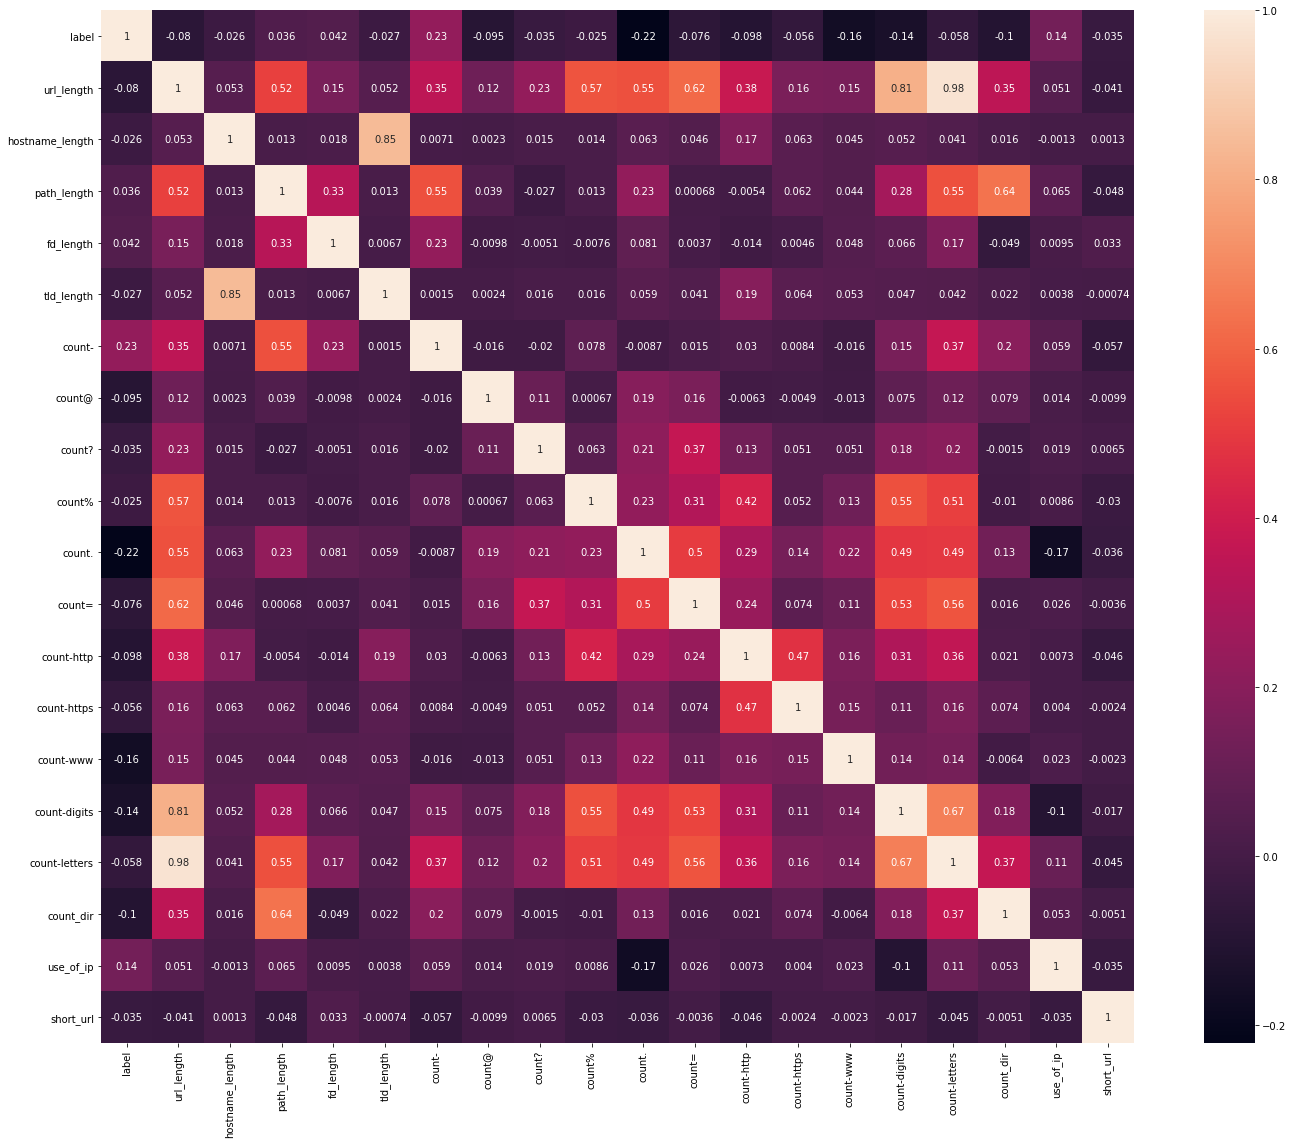

In [115]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

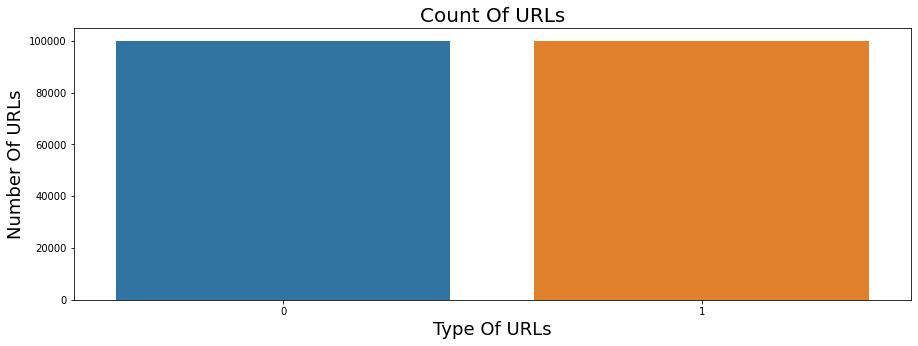

In [116]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [117]:
print("Percent Of Bad URLs:{:.2f} %".format(len(urldata[urldata['label']=='bad'])/len(urldata['label'])*100))
print("Percent Of Good URLs:{:.2f} %".format(len(urldata[urldata['label']=='good'])/len(urldata['label'])*100))

Percent Of Bad URLs:0.00 %
Percent Of Good URLs:0.00 %


Text(0, 0.5, 'Number Of Urls')

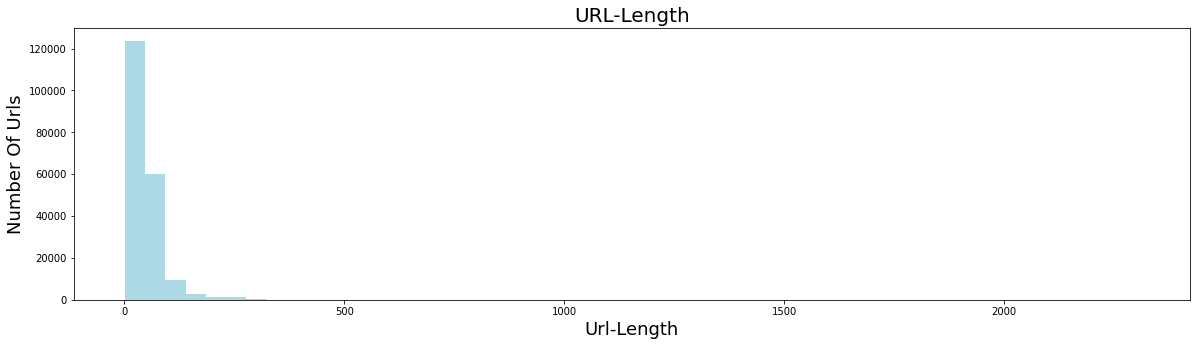

In [118]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)


(0.0, 500.0)

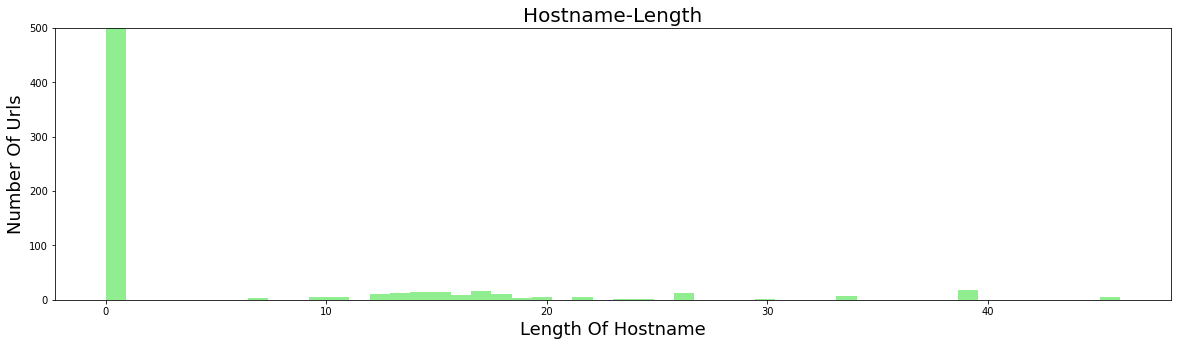

In [119]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,500)

(0.0, 500.0)

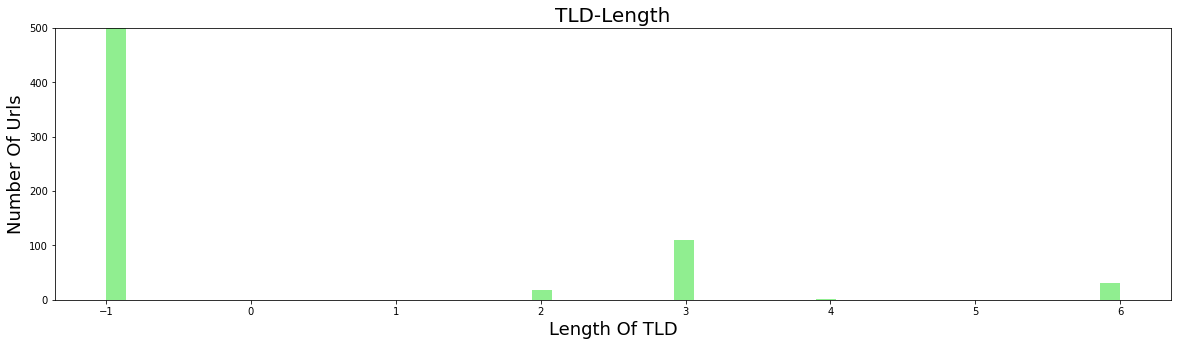

In [120]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,500)


Text(0, 0.5, 'Number Of URLs')

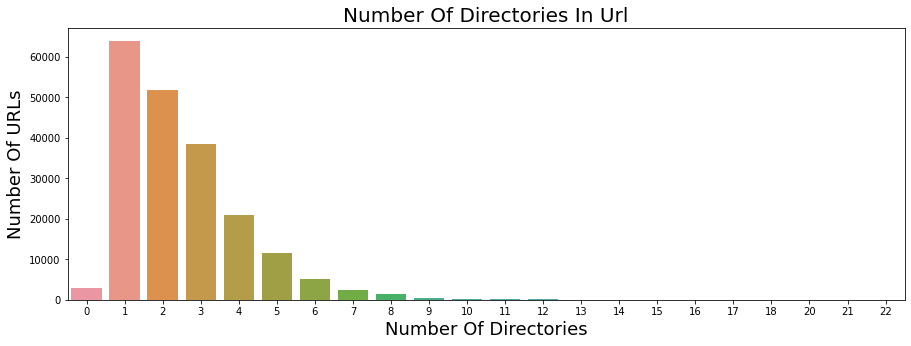

In [121]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

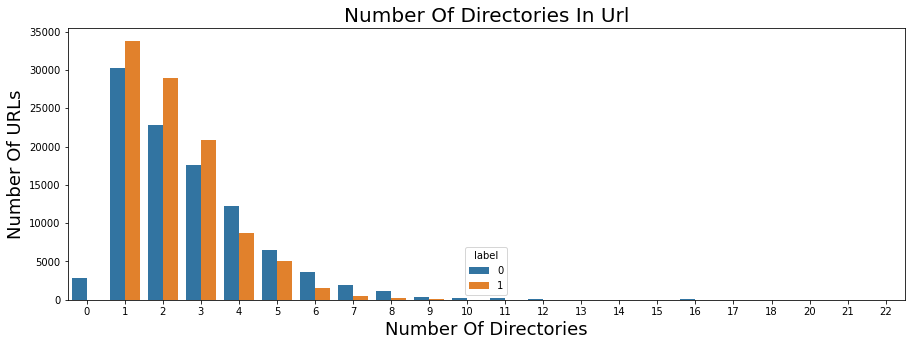

In [122]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

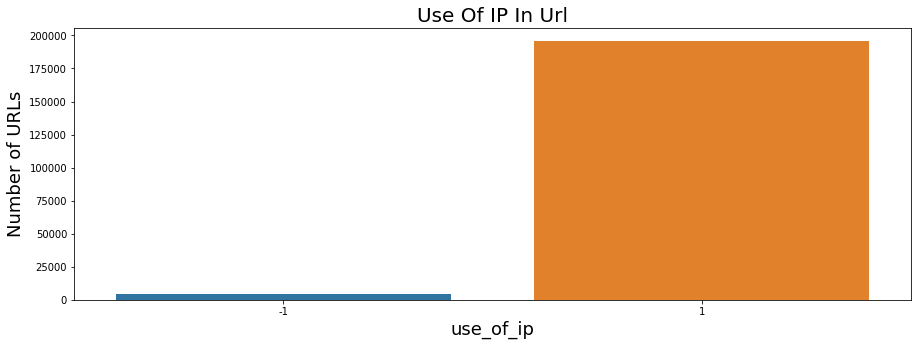

In [123]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

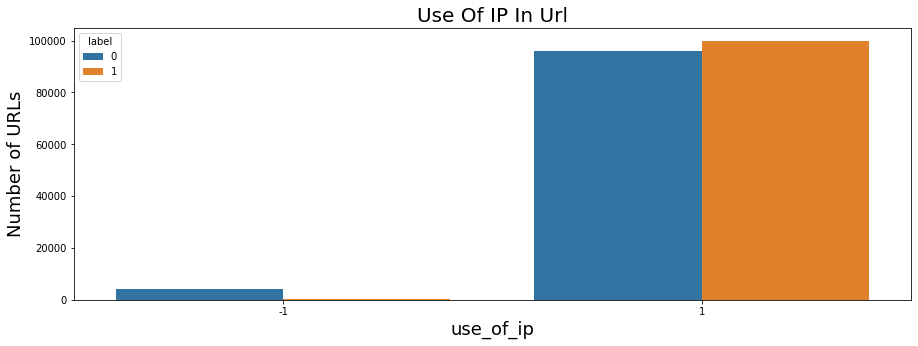

In [124]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

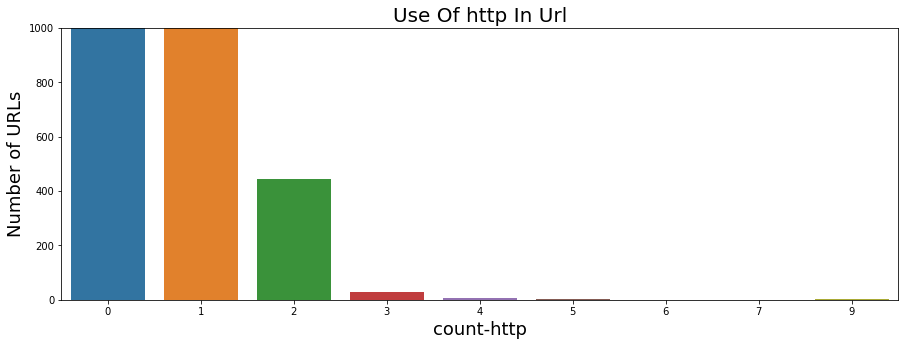

In [125]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

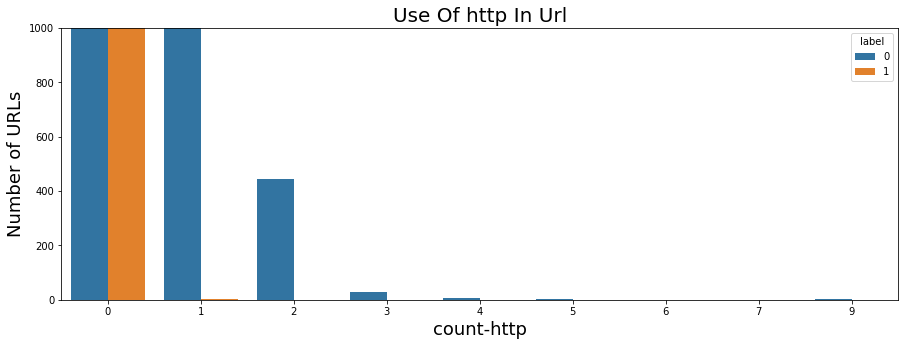

In [126]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

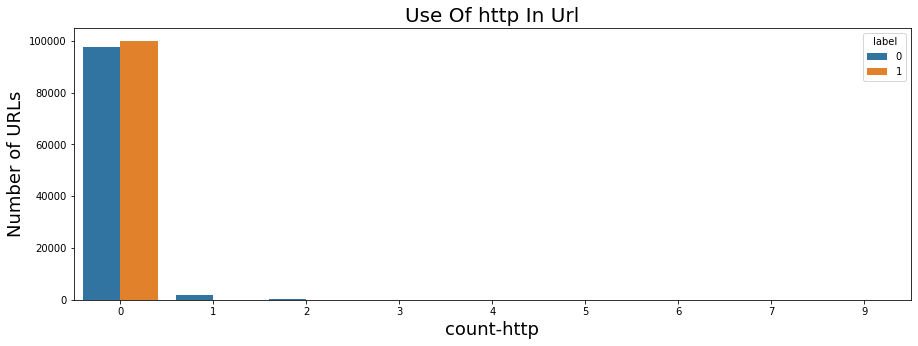

In [127]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(urldata['count-http'],hue='label',data=urldata)

plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

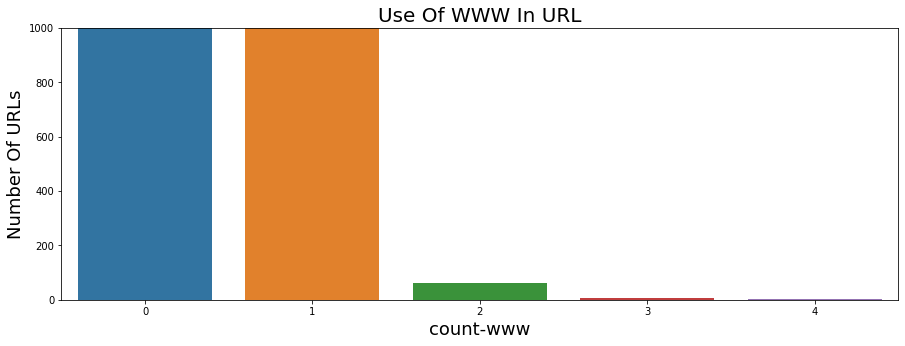

In [128]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

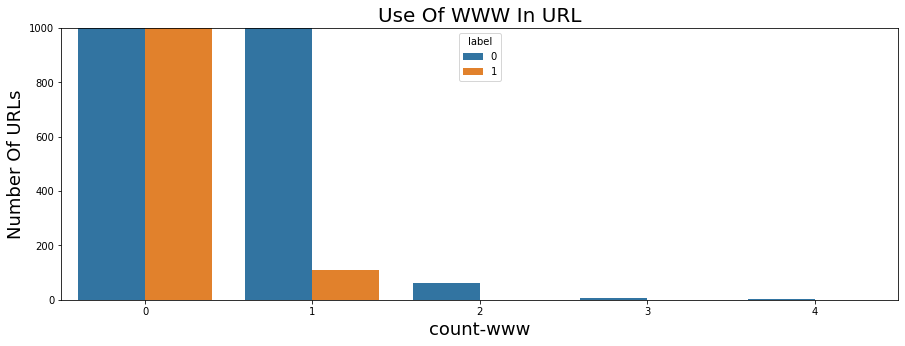

In [129]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

In [131]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['label']

In [132]:
x.shape

(200000, 17)

In [133]:
y.shape

(200000,)

In [134]:
#Splitting the data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify = y, train_size=0.7, random_state=42)

In [135]:
print("X_Train data shape",X_train.shape)
print("y_train data shape",y_train.shape)
print("X_Test data shape",X_test.shape)
print("y_test data shape",y_test.shape)

X_Train data shape (140000, 17)
y_train data shape (140000,)
X_Test data shape (60000, 17)
y_test data shape (60000,)


## Feature Selection

### Removing features with low variance

In [136]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.4)
selector.fit(X_train)
X_train_var = selector.transform(X_train)
X_test_var = selector.transform(X_test)

In [137]:
print(X_train_var.shape)
print(X_test_var.shape)

(140000, 11)
(60000, 11)


### Univariate feature selection

In [138]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

In [139]:
from sklearn.feature_selection import SelectKBest, chi2
# k = Number of top features to select
uni = SelectKBest(chi2, k=10)
uni.fit(X_train, y_train)
X_train_uni= uni.transform(X_train)
X_test_uni = uni.transform(X_test)

In [140]:
print(X_train_uni.shape)
print(X_test_uni.shape)

(140000, 10)
(60000, 10)


In [141]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

## Random Forest with hyperparameter Tuning

In [142]:
#Random Forest with Removing features with low variance features
rfc = RandomForestClassifier()
rfc.fit(X_train_var, y_train)

rfc_predictions = rfc.predict(X_test_var)
accuracy_score(y_test, rfc_predictions)

0.8924666666666666

In [143]:
print(confusion_matrix(y_test,rfc_predictions))

[[27130  2870]
 [ 3582 26418]]


In [144]:
#Random Forest univariate feature selection
rfc = RandomForestClassifier()
rfc.fit(X_train_uni, y_train)

rfc_predictions = rfc.predict(X_test_uni)
accuracy_score(y_test, rfc_predictions)

0.78685

In [145]:
print(confusion_matrix(y_test,rfc_predictions))

[[22189  7811]
 [ 4978 25022]]


## Logistic Regression with Removing features with low variance features

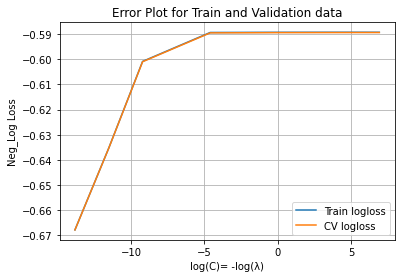

In [146]:
import math
from sklearn.linear_model import LogisticRegression
#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train_var, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [147]:
clf_log = clf.best_estimator_
clf_log

LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
#Trainig with the best value of C
clf_log.fit(X_train_var, y_train)
filename = '/content/drive/My Drive/Malicious_detection/malicious_log_var.pkl'
pickle.dump(clf_log, open(filename, 'wb'))

In [149]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf_log.predict_proba(X_train_var)[:,1])
test_loss  =log_loss(y_test, clf_log.predict_proba(X_test_var)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.5892345059291055
Log_loss on test data is :0.5892563721233556


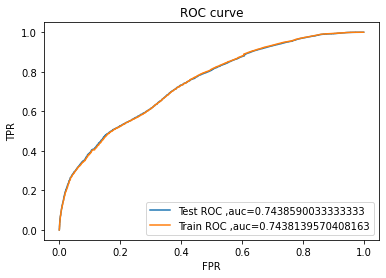

AUC on Test data is 0.7438590033333333
AUC on Train data is 0.7438139570408163
---------------------------


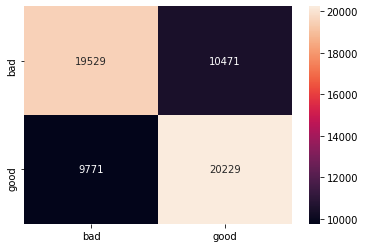

In [150]:
#Testing AUC on Test data
pred_test = clf_log.predict_proba(X_test_var)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = clf_log.predict_proba(X_train_var)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = le.classes_
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [151]:
original =  ["Good" if x==1 else "Bad" for x in y_test[:20]]
predicted = clf_log.predict(X_test_var[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Good"
    pred.append(k)
  else:
    k = "Bad"
    pred.append(k)

# dictionary of lists  
dict = {'original_classlabel': original, 'predicted_classlabel': pred} 
df = pd.DataFrame(dict) 
    
df 


,original_classlabel,predicted_classlabel
0,Bad,Good
1,Good,Good
2,Bad,Bad
3,Bad,Bad
4,Good,Good
5,Good,Good
6,Good,Good
7,Bad,Bad
8,Bad,Bad
9,Good,Good


In [191]:
results = pd.DataFrame(columns=['model', 'Classifier' , 'Train-Auc', 'Test-Auc','Tain-loss','Test-loss'])
new = ['Logistic Regression with Removing features with low variance features','LogisticRegression',0.7438,0.7438,0.5892,0.5892]
results.loc[0] = new

## Logistic Regression with Univariate feature selection

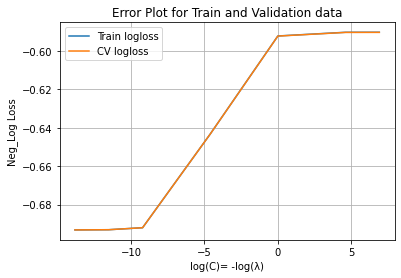

In [153]:
import math
from sklearn.linear_model import LogisticRegression
#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train_uni, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [154]:
clf_log = clf.best_estimator_
clf_log

LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
#Trainig with the best value of C
clf_log.fit(X_train_uni, y_train)
filename = '/content/drive/My Drive/Malicious_detection/malicious_log_uni.pkl'
pickle.dump(clf_log, open(filename, 'wb'))

In [156]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf_log.predict_proba(X_train_uni)[:,1])
test_loss  =log_loss(y_test, clf_log.predict_proba(X_test_uni)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.5904248882150329
Log_loss on test data is :0.592829455625155


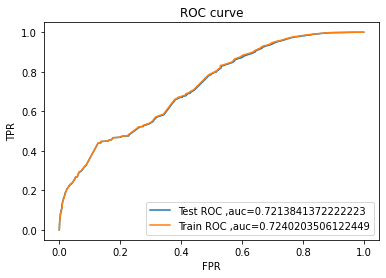

AUC on Test data is 0.7213841372222223
AUC on Train data is 0.7240203506122449
---------------------------


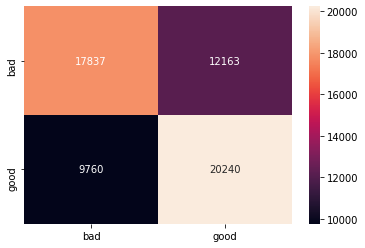

In [157]:
#Testing AUC on Test data
pred_test = clf_log.predict_proba(X_test_uni)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = clf_log.predict_proba(X_train_uni)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = le.classes_
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [158]:
original =  ["Good" if x==1 else "Bad" for x in y_test[:20]]
predicted = clf_log.predict(X_test_uni[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Good"
    pred.append(k)
  else:
    k = "Bad"
    pred.append(k)

# dictionary of lists  
dict = {'original_classlabel': original, 'predicted_classlabel': pred} 
df = pd.DataFrame(dict) 
    
df 


,original_classlabel,predicted_classlabel
0,Bad,Good
1,Good,Good
2,Bad,Bad
3,Bad,Bad
4,Good,Good
5,Good,Good
6,Good,Good
7,Bad,Bad
8,Bad,Bad
9,Good,Good


In [192]:

new = ['Logistic Regression with univariate feature selection ','LogisticRegression',0.7240,0.7213,0.5904,0.5928]
results.loc[1] = new

## Decision Tree with Removing features with low variance features

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
dt = DecisionTreeClassifier()
model = GridSearchCV(dt,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train_var,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 100
optimal max_depth 500


In [161]:
dt_model =model.best_estimator_
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=500, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [162]:
#Trainig with the best value of C
dt_model.fit(X_train_var, y_train)
filename = '/content/drive/My Drive/Malicious_detection/malicious_dt_var.pkl'
pickle.dump(dt_model, open(filename, 'wb'))

In [163]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, dt_model.predict_proba(X_train_var)[:,1])
test_loss  =log_loss(y_test, dt_model.predict_proba(X_test_var)[:,1])


print("Log_loss on train data is :{}".format(round(train_loss),4))
print("Log_loss on test data is :{}".format(round(test_loss),4))

Log_loss on train data is :0.0
Log_loss on test data is :0.0


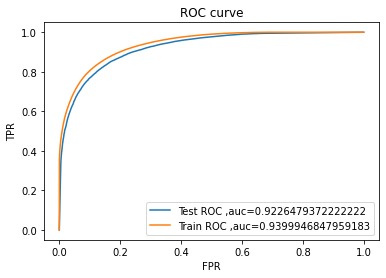

AUC on Test data is 0.9226479372222222
AUC on Train data is 0.9399946847959183
---------------------------


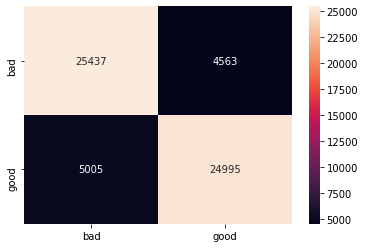

In [164]:
#Testing AUC on Test data
pred_test = dt_model.predict_proba(X_test_var)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = dt_model.predict_proba(X_train_var)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = le.classes_
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [165]:
original =  ["Good" if x==1 else "Bad" for x in y_test[:20]]
predicted = dt_model.predict(X_test_var[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Good"
    pred.append(k)
  else:
    k = "Bad"
    pred.append(k)

# dictionary of lists  
dict = {'original_classlabel': original, 'predicted_classlabel': pred} 
df = pd.DataFrame(dict) 
    
df 


,original_classlabel,predicted_classlabel
0,Bad,Bad
1,Good,Good
2,Bad,Bad
3,Bad,Bad
4,Good,Good
5,Good,Good
6,Good,Good
7,Bad,Good
8,Bad,Bad
9,Good,Good


In [193]:
new = ['Decision Tree with Removing features with low variance features','DecisionTreeClassifier',0.9399,0.9226,0.0,0.0]
results.loc[2] = new

## Decision Tree with Univariate feature selection

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
dt = DecisionTreeClassifier()
model = GridSearchCV(dt,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train_uni,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 10
optimal max_depth 100


In [168]:
dt_model =model.best_estimator_
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
#Trainig with the best value of C
dt_model.fit(X_train_uni, y_train)
filename = '/content/drive/My Drive/Malicious_detection/malicious_dt_uni.pkl'
pickle.dump(dt_model, open(filename, 'wb'))

In [170]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, dt_model.predict_proba(X_train_uni)[:,1])
test_loss  =log_loss(y_test, dt_model.predict_proba(X_test_uni)[:,1])


print("Log_loss on train data is :{}".format(round(train_loss),4))
print("Log_loss on test data is :{}".format(round(test_loss),4))

Log_loss on train data is :0.0
Log_loss on test data is :1.0


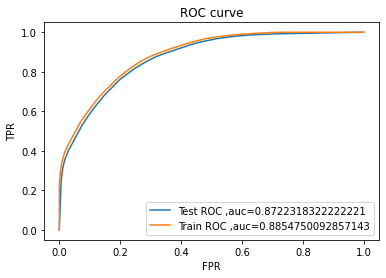

AUC on Test data is 0.8722318322222221
AUC on Train data is 0.8854750092857143
---------------------------


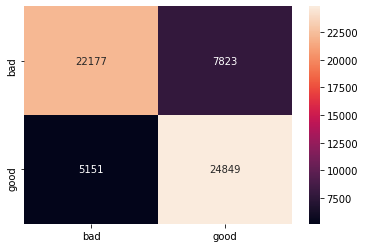

In [171]:
#Testing AUC on Test data
pred_test = dt_model.predict_proba(X_test_uni)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = dt_model.predict_proba(X_train_uni)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = le.classes_
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [172]:
original =  ["Good" if x==1 else "Bad" for x in y_test[:20]]
predicted = dt_model.predict(X_test_uni[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Good"
    pred.append(k)
  else:
    k = "Bad"
    pred.append(k)

# dictionary of lists  
dict = {'original_classlabel': original, 'predicted_classlabel': pred} 
df = pd.DataFrame(dict) 
    
df 


,original_classlabel,predicted_classlabel
0,Bad,Good
1,Good,Good
2,Bad,Bad
3,Bad,Bad
4,Good,Good
5,Good,Good
6,Good,Good
7,Bad,Bad
8,Bad,Bad
9,Good,Good


In [194]:
new = ['Decision Tree with univariate feature selection','DecisionTreeClassifier',0.885,0.8722,1.0,0.0]
results.loc[3] = new

## Random Forest with Removing features with low variance features

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
rf = RandomForestClassifier()
rf = GridSearchCV(rf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
rf.fit(X_train_var,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [175]:
print("optimal n_estimators",rf.best_estimator_.n_estimators)
print("optimal max_depth",rf.best_estimator_.max_depth)

optimal n_estimators 80
optimal max_depth 1000


In [176]:
rf_model =rf.best_estimator_
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
#Trainig with the best value of C
rf_model.fit(X_train_var, y_train)
filename = '/content/drive/My Drive/Malicious_detection/Malicious_rf.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [178]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, rf_model.predict_proba(X_train_var)[:,1])
test_loss  =log_loss(y_test, rf_model.predict_proba(X_test_var)[:,1])


print("Log_loss on train data is :{}".format(round(train_loss),4))
print("Log_loss on test data is :{}".format(round(test_loss),4))

Log_loss on train data is :0.0
Log_loss on test data is :0.0


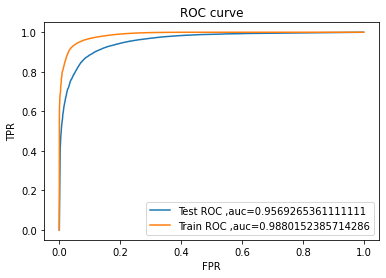

AUC on Test data is 0.9569265361111111
AUC on Train data is 0.9880152385714286
---------------------------


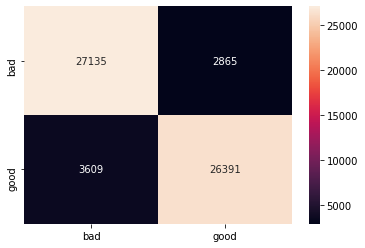

In [179]:
#Testing AUC on Test data
pred_test = rf_model.predict_proba(X_test_var)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = rf_model.predict_proba(X_train_var)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = le.classes_
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [180]:
original =  ["Good" if x==1 else "Bad" for x in y_test[:20]]
predicted = rf_model.predict(X_test_var[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Good"
    pred.append(k)
  else:
    k = "Bad"
    pred.append(k)

# dictionary of lists  
dict = {'original_classlabel': original, 'predicted_classlabel': pred} 
df = pd.DataFrame(dict) 
    
df 

,original_classlabel,predicted_classlabel
0,Bad,Bad
1,Good,Good
2,Bad,Bad
3,Bad,Bad
4,Good,Good
5,Good,Good
6,Good,Good
7,Bad,Bad
8,Bad,Bad
9,Good,Good


In [198]:
new = ['Random Forest with Removing features with low variance features','RandomForestClassifier',0.9880,0.9569,0.0,0.0]
results.loc[4] = new

## Random Forest with Univariate feature selection

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
rf = RandomForestClassifier()
rf = GridSearchCV(rf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
rf.fit(X_train_uni,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [183]:
print("optimal n_estimators",rf.best_estimator_.n_estimators)
print("optimal max_depth",rf.best_estimator_.max_depth)

optimal n_estimators 40
optimal max_depth 100


In [184]:
rf_model =rf.best_estimator_
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
#Trainig with the best value of C
rf_model.fit(X_train_uni, y_train)
filename = '/content/drive/My Drive/Malicious_detection/Malicious_rf_uni.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [186]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, rf_model.predict_proba(X_train_uni)[:,1])
test_loss  =log_loss(y_test, rf_model.predict_proba(X_test_uni)[:,1])


print("Log_loss on train data is :{}".format(round(train_loss),4))
print("Log_loss on test data is :{}".format(round(test_loss),4))

Log_loss on train data is :0.0
Log_loss on test data is :0.0


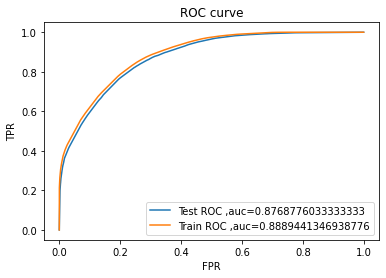

AUC on Test data is 0.8768776033333333
AUC on Train data is 0.8889441346938776
---------------------------


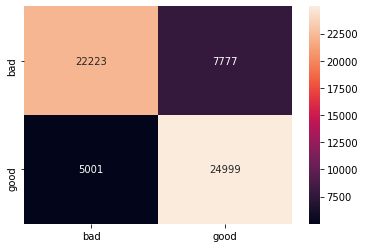

In [187]:
#Testing AUC on Test data
pred_test = rf_model.predict_proba(X_test_uni)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = rf_model.predict_proba(X_train_uni)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = le.classes_
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [188]:
original =  ["Good" if x==1 else "Bad" for x in y_test[:20]]
predicted = rf_model.predict(X_test_uni[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Good"
    pred.append(k)
  else:
    k = "Bad"
    pred.append(k)

# dictionary of lists  
dict = {'original_classlabel': original, 'predicted_classlabel': pred} 
df = pd.DataFrame(dict) 
    
df 

,original_classlabel,predicted_classlabel
0,Bad,Bad
1,Good,Good
2,Bad,Bad
3,Bad,Bad
4,Good,Good
5,Good,Good
6,Good,Good
7,Bad,Bad
8,Bad,Bad
9,Good,Good


In [196]:
new = ['Random Forest with Univariate feature selection','RandomForestClassifier',0.87687,0.8889,0.0,0.0]
results.loc[5] = new

## Performance Table

In [199]:
results

,model,Classifier,Train-Auc,Test-Auc,Tain-loss,Test-loss
0,Logistic Regression with Removing features wit...,LogisticRegression,0.74380,0.7438,0.5892,0.5892
1,Logistic Regression with univariate feature se...,LogisticRegression,0.72400,0.7213,0.5904,0.5928
2,Decision Tree with Removing features with low ...,DecisionTreeClassifier,0.93990,0.9226,0.0000,0.0000
3,Decision Tree with univariate feature selection,DecisionTreeClassifier,0.88500,0.8722,1.0000,0.0000
4,Random Forest with Removing features with low ...,RandomForestClassifier,0.98800,0.9569,0.0000,0.0000
5,Random Forest with Univariate feature selection,RandomForestClassifier,0.87687,0.8889,0.0000,0.0000
